<a href="https://colab.research.google.com/github/OBB-2199/EscapeEarth/blob/main/Interns/Olivia/Sample_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount google drive to access files

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## typical imports
%matplotlib inline
!pip install lightkurve==1.9.0 #b/c non-standard library & we want a specific version
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.mast import Catalogs

     |████████████████████████████████| 501kB 11.7MB/s 
     |████████████████████████████████| 256kB 23.7MB/s 
     |████████████████████████████████| 6.5MB 20.7MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 3.2MB 60.0MB/s 
  Created wheel for oktopus: filename=oktopus-0.1.2-cp37-none-any.whl size=12780 sha256=2b6ac572f46eac7e002ecd15f624d7b90ca1dcf1528c61ad2906de72f22209c9
  Stored in directory: /root/.cache/pip/wheels/9b/90/81/098fc66ee56166d63c9a8fc0a9672ae7b3423396a588ec952a
  Created wheel for fbpca: filename=fbpca-1.0-cp37-none-any.whl size=11376 sha256=c173676c182f7546cc5c612404135e4afab26ce348774522f23b4a9f5deb5c21
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for astroquery: filename=astroquery-0.4.1-cp37-none-any.whl size=3831874 sha256=9396b3d357be0641bb890828dcec2d974af93cd72cccb37d9019d21091d1b52e
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
candidates = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/exoplanet_candidates.csv')
candidates

,TIC,Sector,author,ExoFOPclass,notes
0,233120979,14,danielle,PC,wrong orbital period but definitely transits i...
1,28230919,14,olivia,Unknown,seems to line up
2,99813351,14,olivia,Unknown,"wrong orbital period, possibly a transit"
3,26656583,14,olivia,Unknown,NaN
4,99920728,14,olivia,Unknown,NaN
...,...,...,...,...,...
124,396779850,14,olivia,Unknown,No information regarding the dispositions and ...
125,406951407,14,olivia,Unknown,No information regarding the dispositions and ...
126,408474216,14,olivia,Unknown,No information regarding the dispositions and ...
127,416195870,14,olivia,PC,NaN


In [ ]:
#vet those visually found transits for types (if known)
planets_index = []
unknown_index = []
falsep_index = []

for idx, i in enumerate(candidates['ExoFOPclass'].to_numpy()):
  if i == 'PC':
    planets_index.append(idx)
  elif (i[0] == 'U') | (i[0] == 'u'):
    unknown_index.append(idx)
  elif i == 'FP':
    falsep_index.append(idx)
  else:
    print('Something went wrong',idx, i)

all_list = [falsep_index,unknown_index,planets_index]
for i in all_list:
  print(len(i))

18
105
6


In [ ]:
#apply index masks to isolate types of transits
falsep = candidates.iloc[falsep_index]
unknown = candidates.iloc[unknown_index]
planets = candidates.iloc[planets_index]

print(len(falsep),len(unknown),len(planets))

18 105 6


In [ ]:
#open stats data
main_df = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/main_df.csv')
main_df

,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,7582633,0.299916,0.298,0.157,0,0.000398,14
1,7582634,0.299916,0.298,0.161,0,0.000534,14
2,7583285,0.301269,0.298,0.162,1,0.000406,14
3,7584971,0.301269,0.298,0.157,1,0.000111,14
4,7585322,0.299916,0.298,0.154,0,0.000102,14
...,...,...,...,...,...,...,...
32030,2002418280,0.299916,0.298,0.155,0,0.000474,15
32031,2002418281,0.299916,0.298,0.159,0,0.000462,15
32032,2002486147,0.301269,0.298,0.161,1,0.000159,15
32033,2003139541,0.299916,0.298,0.158,0,0.000235,15


In [ ]:
#merge each transit group with stats data to get the specific stats (specific data for each star)
falsep_list = main_df[np.isin(main_df['TIC'],falsep['TIC'])] #np.isin(master_list,child_list)
planet_list = main_df[np.isin(main_df['TIC'],planets["TIC"])]
unknown_list = main_df[np.isin(main_df['TIC'],unknown['TIC'])]
print(len(falsep_list),len(planet_list),len(unknown_list))

27 10 139


In [ ]:
planet_list2 = pd.concat([planet_list, planet_list, planet_list, planet_list, planet_list,  
                          planet_list, planet_list, planet_list, planet_list, planet_list])
falsep_list2 = pd.concat([falsep_list, falsep_list, falsep_list, falsep_list, falsep_list,
                          falsep_list, falsep_list, falsep_list, falsep_list, falsep_list])

In [ ]:
#plot histograms with each group type overlaid on top
fig,ax= plt.subplots(4,2,figsize=(18,22))
for i,col in enumerate(main_df.columns):
  N =[15,15,5,15,5,30,25,15]
  if min(main_df[col].to_numpy()) == 0:
    bins=np.logspace(np.log10(min(main_df[col].to_numpy())+0.005),np.log10(max(main_df[col].to_numpy())), N[i])
  else:
    bins=np.logspace(np.log10(min(main_df[col].to_numpy())),np.log10(max(main_df[col].to_numpy())), N[i])
  if i<4:
    ax[i,0].hist(main_df[col],bins,label = 'full data')
    ax[i,0].hist(falsep_list2[col],bins,label='false pos')
    ax[i,0].hist(unknown_list[col],bins,label='unknown')
    ax[i,0].hist(planet_list2[col],bins,label='planets')
    ax[i,0].set_title(col,fontsize=25)
    ax[i,0].legend()
  else:
    ax[i-4,1].hist(main_df[col],bins,label = 'full data')
    ax[i-4,1].hist(falsep_list2[col],bins,label='false pos')
    ax[i-4,1].hist(unknown_list[col],bins,label='unknown')
    ax[i-4,1].hist(planet_list2[col],bins,label = 'planets')
    ax[i-4,1].set_title(col,fontsize=25)
    ax[i-4,1].legend()

  plt.tight_layout()

In [ ]:
#apply promisising thresholds to see reduced sample size
#power > 50
#duraction < 0.125

p = main_df["Power"]>50
d = main_df["Duration"] < 0.125

reduced_df = main_df[(p) & (d)]
print(len(main_df))
reduced_df

32035


,TIC,Period,Duration,Transit Time,Power,Depth,Sector
143,13118768,13.456649,0.106,0.05300,845,0.015350,14
169,14323558,9.557853,0.010,8.86000,769,0.088655,14
422,26584043,0.445693,0.074,0.40000,88,0.003599,14
425,26656583,0.528840,0.074,0.50100,126,0.138116,14
556,27843942,0.761510,0.074,0.72200,207,0.203324,14
...,...,...,...,...,...,...,...
31499,441804888,1.367161,0.074,1.20700,337,0.054683,15
31555,445836238,2.004430,0.106,0.20600,422,0.146150,15
31576,445859771,4.630337,0.042,0.98600,608,0.002255,15
31603,452587442,11.495120,0.010,0.00488,810,0.001692,15


In [ ]:
#download tic catalog for reduced sample

#get tic ids list
tics_list = reduced_df["TIC"].to_numpy()
#get tic catalog
catalog_data = Catalogs.query_criteria(catalog='Tic',ID=tics_list)
catalog_df = catalog_data.to_pandas() #turn astropy table into pandas 
catalog_df
# list(catalog_df.columns)


,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,...,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
0,13118768,20190415,<NA>,3152-01798-1,646-089968,20205105+3900453,NaN,J202051.05+390045.4,2061395533983428992,50536431,<NA>,STAR,tmgaia2,305.212771,39.012643,tmgaia2,-2.709860,0.064781,-3.68472,0.065582,gaia2,0.320102,0.039612,gaia2,76.974150,1.377461,323.457211,56.105649,12.761,0.287,11.34100,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.054630,0.087870,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.640,364.690,bj2018,NaN,NaN,dered,11.60030,0.052945,8.84114,0.039647,1,NaN,tycho2v3,tycho2b3,NaN,1.065644,1.017128,305.212756,39.012627,0.029138,0.034999,0,0,396996177
1,14323558,20190415,<NA>,NaN,653-092899,20241933+4033400,NaN,J202419.33+403339.8,2067549118302850304,51799923,<NA>,STAR,tmgaia2,306.080609,40.561087,tmgaia2,-3.998640,0.063423,-5.22128,0.078828,gaia2,0.396352,0.039375,gaia2,78.626628,1.714544,325.746810,57.228113,14.143,0.951,11.29000,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.032228,0.081061,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.160,244.180,bj2018,NaN,NaN,dered,12.25960,0.073629,9.25216,0.052479,1,NaN,ucac4,apassdr9,NaN,1.048484,1.222534,306.080586,40.561064,0.030728,0.041553,0,0,401157849
2,15788257,20190415,<NA>,3152-00760-1,639-090512,20282853+3747218,NaN,J202828.53+374721.4,2058048517498228864,NaN,<NA>,STAR,tmgaia2,307.118886,37.789362,tmgaia2,0.022582,0.084235,-14.31680,0.074828,gaia2,2.272780,0.047773,gaia2,76.834764,-0.548175,324.961641,54.375838,9.060,0.017,7.46501,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.023341,0.062129,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.914,9.289,bj2018,NaN,NaN,dered,7.82991,0.009904,4.90518,0.004144,1,NaN,sirful,tycho2b3,NaN,1.380558,1.160619,307.118886,37.789301,0.039014,0.042714,0,0,405114482
3,16617827,20190415,<NA>,NaN,644-093021,20310525+3847006,NaN,J203105.22+384659.4,2064107926079227648,50547799,<NA>,STAR,tmgaia2,307.771882,38.783478,tmgaia2,-24.610000,2.000000,-103.00000,2.000000,sblink,NaN,NaN,NaN,77.940407,-0.379087,326.488348,55.063954,11.751,0.280,11.12600,0.057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dered,11.62360,0.055250,10.67350,0.051330,0,NaN,ucac4,apassdr9,NaN,32.864960,31.000008,307.771746,38.783035,0.019756,0.022743,1,0,407853878
4,26584043,20190415,<NA>,3551-00183-1,695-066800,19281062+4856369,NaN,J192810.61+485636.0,2129722038386345472,54443748,11244501,STAR,tmgaia2,292.044285,48.943530,tmgaia2,-8.635730,0.045241,-66.23690,0.043199,gaia2,9.445950,0.023352,gaia2,80.884833,14.509196,313.629043,69.067209,10.646,0.065,9.93500,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.004684,0.001545,0.002819,panstarrs,0.121205,0.129359,0.039780,0.092235,0.143803,0.218956,0.070150,0.103765,0.026203,0.023051,0.262,0.262,bj2018,147.753,139.740,spect,10.27840,0.005166,9.28557,0.004795,1,NaN,tycho2v3,tycho2b3,NaN,0.770690,0.670026,292.044228,48.943245,0.019350,0.024440,1,0,288792450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,441804888,20190415,<NA>,4436-00905-1,814-022409,17432410+7236404,NaN,J174324.08+723640.4,1651482068538045056,602944

In [ ]:
#do things needed to make CMD plot
magnitude = []
#convert mas into arcseconds
for i,m in zip(catalog_df['plx'],catalog_df['GAIAmag']):
  parallax = i/1000
  d= 1/parallax
  M = m - 5 * np.log10(d) + 5
  magnitude.append(M)
  # print(i,m)
# m - M = 5 log(d) - 5

Text(0, 0.5, 'Absolute Magnitude')

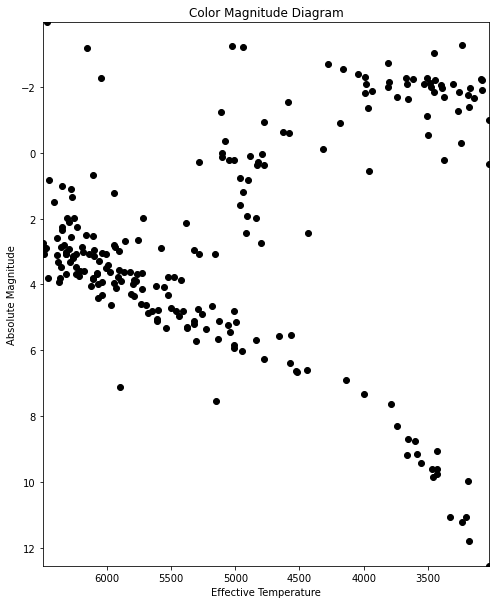

In [ ]:
%matplotlib inline
teff = catalog_df['Teff']

plt.figure(figsize = (8,10))
plt.scatter(teff,magnitude,color='black')
plt.xlim(teff.max(), teff.min())
plt.ylim(max(magnitude),min(magnitude))
plt.title('Color Magnitude Diagram')
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute Magnitude')

In [ ]:
# #slope
# slope = -0.0025714286
# y_int = 15.4285715
x = np.arange(2500,6600,100) 
y_points = []
# print(x)

#equation
# y = (slope)x_array + y_int

In [ ]:
def slope (y2,y1,x2,x1):
  m = (y2 -y1) / (x2-x1)
  b = -(m*x1) + y1
  for i in x:
    y = m * i + b
    y_points.append(y)
  return m,b

In [ ]:
m,b = slope(-1,8,6500,3000)

In [ ]:
# y_points = []

# for i in x:
#   y = slope * i + y_int
#   y_points.append(y)
#   # print(y)

In [ ]:
x_array = np.array(x)
y_array = np.array(y_points)
# print(x_array)
# print(y_array)

Text(0, 0.5, 'Absolute Magnitude')

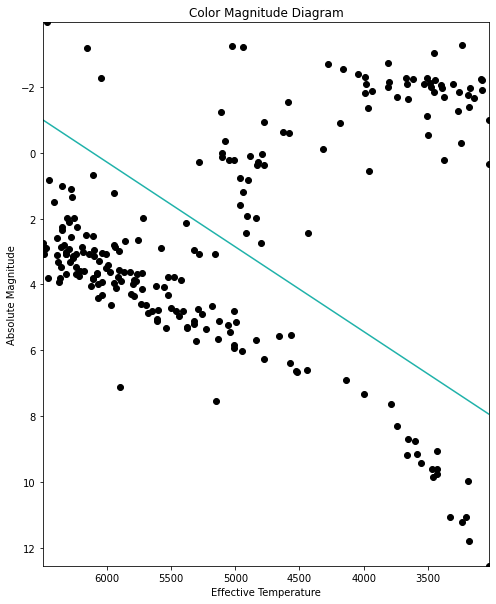

In [ ]:
%matplotlib inline
plt.figure(figsize = (8,10))
plt.scatter(teff,magnitude,color='black')
plt.plot(x_array,y_array,color='lightseagreen')
plt.xlim(teff.max(), teff.min())
plt.ylim(max(magnitude),min(magnitude))
plt.title('Color Magnitude Diagram')
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute Magnitude')

In [ ]:
lineMs = []

for i in teff:
  lineM = m * i + b
  lineMs.append(lineM)


In [ ]:
catalog_df['ABS Mag'] = magnitude
print(catalog_df)

            ID   version    HIP  ... wdflag      objID   ABS Mag
0     13118768  20190415   <NA>  ...      0  396996177 -2.399358
1     14323558  20190415   <NA>  ...      0  401157849 -1.532595
2     15788257  20190415   <NA>  ...      0  405114482 -2.081453
3     16617827  20190415   <NA>  ...      0  407853878       NaN
4     26584043  20190415   <NA>  ...      0  288792450  4.718098
..         ...       ...    ...  ...    ...        ...       ...
239  441804888  20190415   <NA>  ...      0  175201384  2.568482
240  445836238  20190415  61006  ...      0  146036696  3.867383
241  445859771  20190415   <NA>  ...      0  151066273  4.613869
242  452587442  20190415   <NA>  ...      0  408133950 -2.203171
243  469460566  20190415   <NA>  ...      0  408160522  1.192578

[244 rows x 126 columns]


In [ ]:
mask = []

for i,j in zip(catalog_df['ABS Mag'],lineMs):
  if i > j:
    mask.append(True)
  else:
    mask.append(False)

In [ ]:
 nog = catalog_df[mask]

Text(0, 0.5, 'Absolute Magnitude')

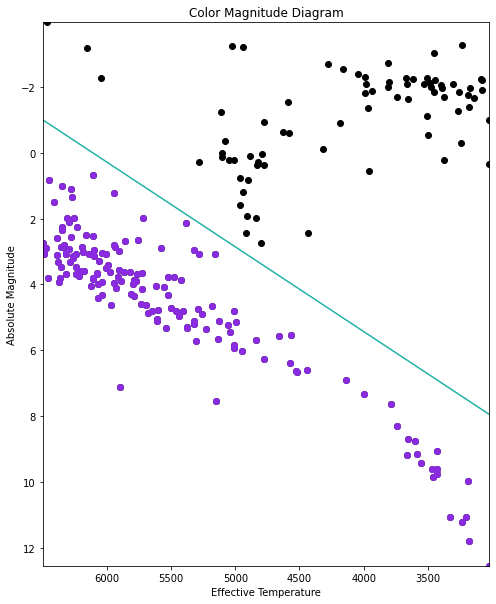

In [ ]:
%matplotlib inline
plt.figure(figsize = (8,10))
plt.scatter(teff,magnitude,color='black')
plt.scatter(nog['Teff'],nog['ABS Mag'],color='blueviolet')
plt.plot(x_array,y_array,color='lightseagreen')
plt.xlim(teff.max(), teff.min())
plt.ylim(max(magnitude),min(magnitude))
plt.title('Color Magnitude Diagram')
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute Magnitude')

In [ ]:
nog

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,...,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ABS Mag
4,26584043,20190415,<NA>,3551-00183-1,695-066800,19281062+4856369,NaN,J192810.61+485636.0,2129722038386345472,54443748,11244501,STAR,tmgaia2,292.044285,48.943530,tmgaia2,-8.63573,0.045241,-66.23690,0.043199,gaia2,9.44595,0.023352,gaia2,80.884833,14.509196,313.629043,69.067209,10.646,0.065,9.935,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004684,0.001545,0.002819,panstarrs,0.121205,0.129359,0.039780,0.092235,0.143803,0.218956,0.070150,0.103765,0.026203,0.023051,0.2620,0.2620,bj2018,147.7530,139.740,spect,10.27840,0.005166,9.28557,0.004795,1,NaN,tycho2v3,tycho2b3,NaN,0.770690,0.670026,292.044228,48.943245,0.019350,0.024440,1,0,288792450,4.718098
5,26656583,20190415,<NA>,3564-01688-1,698-069158,19301822+4931325,NaN,J193018.24+493133.2,2129813469650632064,54446097,11560447,STAR,tmgaia2,292.575961,49.525712,tmgaia2,15.61760,0.053184,62.78720,0.046020,gaia2,7.93962,0.031862,gaia2,81.581227,14.439999,315.216611,69.445791,11.679,0.139,11.096,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.002801,0.003669,0.003956,panstarrs,0.097937,0.146821,0.057792,0.040721,0.470629,0.383539,0.090284,0.076151,0.017125,0.014185,0.5040,0.5080,bj2018,93.1649,192.239,spect,11.29630,0.018626,10.26440,0.016484,1,NaN,tycho2v3,tycho2b3,NaN,0.908227,0.713839,292.576065,49.525983,0.026720,0.027550,1,0,293647317,5.329599
7,27843942,20190415,<NA>,NaN,707-065798,19454606+5113275,NaN,J194546.06+511327.4,2135488770715834496,55728891,12418816,STAR,tmgaia2,296.441888,51.224299,tmgaia2,6.46022,0.045214,-2.69806,0.043673,gaia2,4.13598,0.023822,gaia2,84.270443,12.978797,323.763711,69.772709,13.715,0.025,12.779,0.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000843,0.004042,0.002750,panstarrs,0.060676,0.108071,0.094729,0.094678,0.100550,0.122906,0.101573,0.090372,0.017759,0.039043,1.3760,1.3920,bj2018,104.0680,139.194,spect,13.00080,0.003844,11.77430,0.002877,1,NaN,ucac4,apassdr9,NaN,0.777445,0.677344,296.441933,51.224287,0.019893,0.023543,1,0,334931959,5.537392
8,27915909,20190415,<NA>,3561-00922-1,693-071357,19471820+4826361,NaN,J194718.22+482636.1,2086643104093265792,54466249,10987439,STAR,tmgaia2,296.825880,48.443339,tmgaia2,12.23340,0.059813,4.96015,0.060169,gaia2,2.67200,0.031236,gaia2,81.871846,11.462243,320.649452,67.223843,11.314,0.109,10.689,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000969,0.010002,0.015610,panstarrs,0.198998,0.228531,0.089318,0.128627,0.052318,0.057282,0.097923,0.104853,0.323779,0.293419,4.2670,4.3660,bj2018,175.3610,148.135,spect,11.02350,0.000878,10.33890,0.000641,1,NaN,tycho2v3,tycho2b3,NaN,1.016970,0.933177,296.825959,48.443360,0.027646,0.032123,1,0,338972385,2.882082
9,28230919,20190415,97657,3561-02092-1,691-070316,19505021+4804508,NaN,NaN,2086512227851023872,54470133,10748390,STAR,tmgaia2,297.709364,48.080860,tmgaia2,125.98400,0.040610,232.98800,0.044990,gaia2,26.45080,0.023446,gaia2,81.833703,10.772381,321.548036,66.629442,10.556,0.141,9.460,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.010943,0.000000,0.000000,NaN,0.075780,0.099804,0.051426,0.045157,0.418599,0.455017,0.080525,0.092496,0.009814,0.008251,0.0336,0.0337,bj2018,107.3600,118.373,spect,9.74374,0.001652,8.46507,0.001891,1,NaN,hipvmag,apassdr9,NaN,0.689515,0.697757,297.710176,48.081864,0.019271,0.024141,1,0,347873767,6.263174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.